In [1]:
import numpy as np
import scipy.linalg
from scipy.stats import ortho_group
from scipy.io import loadmat
from localizer import Localizer
import psi4

#https://github.com/molmod/molmod
from molmod.units import angstrom, debye

import matplotlib.pyplot as plt

#importing the QM7 database
data = dict(loadmat('../molecule_geometries/qm7.mat'))
Z = data['Z'] # numbers
R = data['R']/angstrom # positions in angstrom

# Molecule order: H2O,CO2,HCN,Acetonitrile,H2SO4,Benzene,Diborane
numbers = np.load('../molecule_geometries/nuclei_numbers.npy')
positions = np.load('../molecule_geometries/positions.npy')

In [7]:
loc = Localizer(numbers[1],positions[1])

Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_


In [2]:
loc = Localizer(Z[0],R[0],0)

Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_


In [8]:
w, quad_diff = loc.perform_sweep(p_min=0.,p_max=3., scheme='V2')

['V2', 0.0]
Convergence: norm of riemann gradient below 10^-5
['V2', 0.3333333333333333]
Convergence: norm of riemann gradient below 10^-5
['V2', 0.6666666666666666]
Convergence: norm of riemann gradient below 10^-5
['V2', 1.0]
Convergence: norm of riemann gradient below 10^-5
['V2', 1.3333333333333333]
Convergence: stepsize < 10^-10
['V2', 1.6666666666666665]
Convergence: stepsize < 10^-10
['V2', 2.0]
Convergence: stepsize < 10^-10
['V2', 2.333333333333333]
No convergence!
['V2', 2.6666666666666665]
Convergence: stepsize < 10^-10
['V2', 3.0]
No convergence!


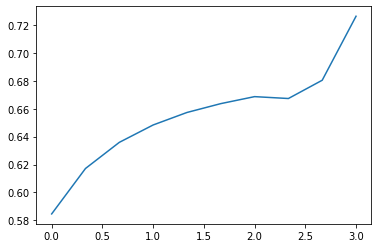

In [11]:
plt.plot(w,quad_diff[:,0,0])

## Parameter sweep using bondlengths for CO2

In [10]:
length = np.linspace(-0.03, 0.03, 15)
for l in length:
    p = np.zeros((3,3))
    p[0,0] = -l
    p[1,0] = l
    p += positions
    loc = Localizer(numbers, p)
    loc.optimize_line_search()
    loc.write_centers(append=True,filename='xyz_files/CO2_bond_sweep.xyz')

Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: no